<a href="https://colab.research.google.com/github/yohe4274/2020SpringSeminar/blob/master/YOLOv3FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0 
- 編集→ノートブックの設定から，<br>
ランタイムのタイプをPython3に，ハードウェアアクセラレーターをGPUにする．

### Git clone 2020SpringSeminar repository in your branch.

- 以下のコマンドのmaster部分を自分のブランチ名に変更する．

In [0]:
!git clone -b master https://github.com/NAIST2020SpringSeminarUbi/2020SpringSeminar.git

Cloning into '2020SpringSeminar'...
remote: Enumerating objects: 843, done.
remote: Counting objects: 100% (843/843), done.
remote: Compressing objects: 100% (681/681), done.
remote: Total 5280 (delta 185), reused 794 (delta 161), pack-reused 4437
Receiving objects: 100% (5280/5280), 892.47 MiB | 50.55 MiB/s, done.
Resolving deltas: 100% (331/331), done.
Checking out files: 100% (4988/4988), done.


In [0]:
%%bash
cd /content/2020SpringSeminar/ObjectDetection/
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -W

### Download YOLOv3 weight pretrained imagenet

In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-02-08 05:39:24--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  54.2MB/s    in 2.9s    

2020-02-08 05:39:27 (54.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



 # Step 1 
 ### Training(Fine Tuning)

 - 以下のコマンドで学習を開始する．学習による重みファイル”〜〜-frozen_final.weightsf”が出力される．
 - **[重要] ランタイムアウトするとファイルが自動削除されるので学習が終わり次第ドライブに退避させる**
+ [ ]  **確認6(最終)**：以下のコマンドを実行したらメンターに確認してもらう．もうひと頑張り！



In [0]:
%%bash
cd ./2020SpringSeminar/ObjectDetection/
./darknet detector \
        train \
        cfg/JapaneseObject.data \
        cfg/JapaneseObject-frozen.cfg \
        /content/darknet53.conv.74 > /content/log

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

### Mounte Google Drive
- 重みの保存先のDriveをマウントする．

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.makedirs( 'drive/My Drive/2020SpringSeminar/backup', exist_ok=True)

### copy weight file to Dirve

- 以下のコマンドを，自分のドライブまでのパスに書き換える．
- !cp 2020SpringSeminar/ObjectDetection/backup/〜〜-* drive/My\ Drive/自分のパス

In [0]:
!cp 2020SpringSeminar/ObjectDetection/backup/JapaneseObject-* drive/My\ Drive/2020SpringSeminar/backup

 # Step 2
### Validation 
- 実際にドラレコの動画から得られるフレーム画像に対して検証してみる．
- threshに指定する値で画像に出力する識別結果を制限できる。0.1を指定した場合は「そのクラスである確率は10%以上」

In [0]:
!ls 

2020SpringSeminar  darknet53.conv.74  drive  log  sample_data


#### Step2-1 まず1枚を検証する． 
- ../Resource/Validation/Torii/route3_000120.jpgを自分の検証したい画像へのパスに変更する．

In [0]:
%%bash
cp drive/My\ Drive/2020SpringSeminar/backup/JapaneseObject-frozen_final.weights  2020SpringSeminar/ObjectDetection/
cd ./2020SpringSeminar/ObjectDetection/
# sudo ./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg JapaneseObject-frozen_final.weights ../Resource/Validation/Torii/route3_000121.jpg -thresh 0.5
sudo ./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg JapaneseObject-frozen_final.weights test_torii.png -thresh 0.5

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

#### Step 2-1 画像を描画する(YOLOv3にて検出後の画像を描画する)

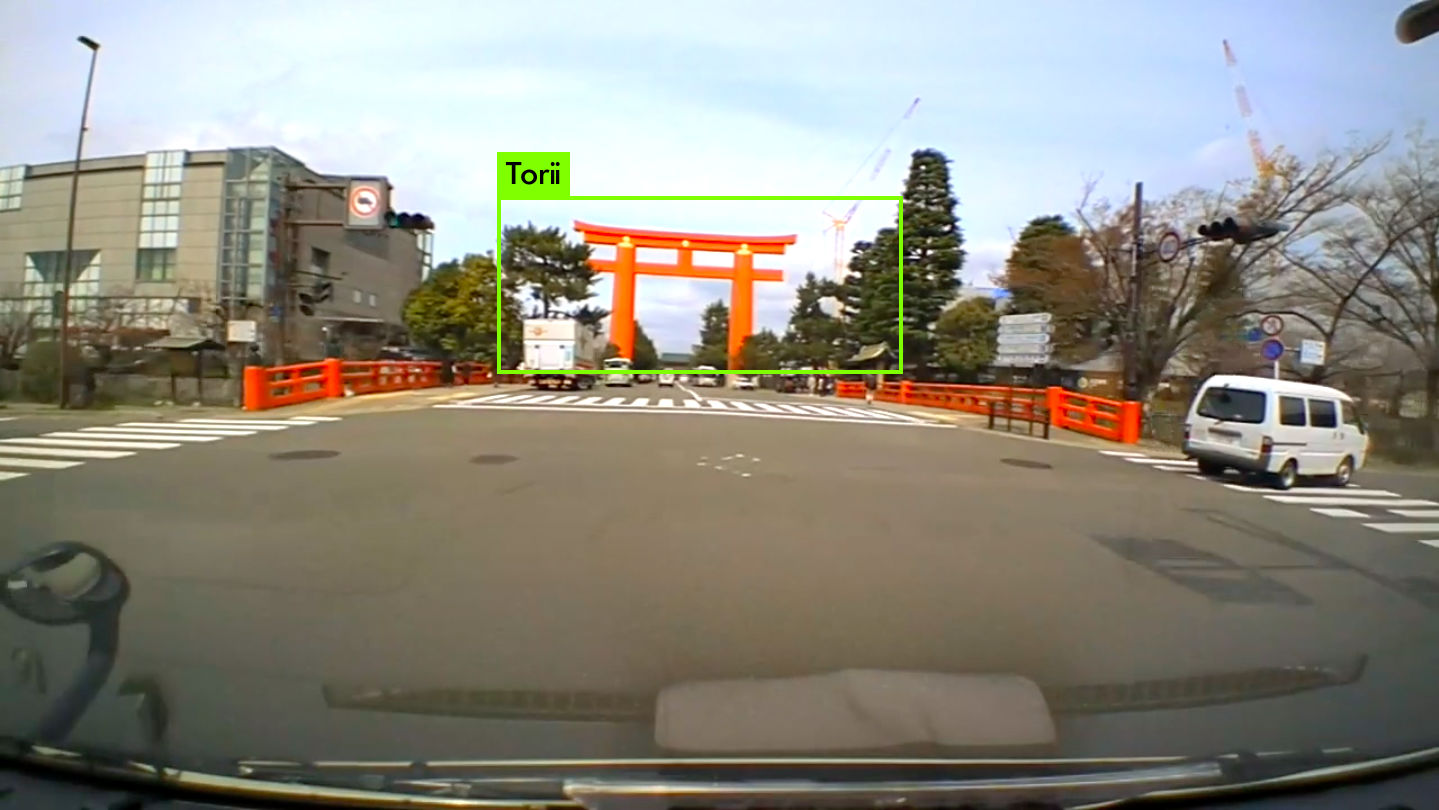

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('2020SpringSeminar/ObjectDetection/predictions.jpg'))

#### Step 2-2 Apply YOLOv3 to each validation images
検証用のデータセットの全ての画像に対してYOLOv3を適用してDriveに保存する．

In [0]:
!ls

2020SpringSeminar  darknet53.conv.74  drive  log  sample_data


In [0]:
import os
output = 'drive/My Drive/2020SpringSeminar/output'
os.makedirs(output, exist_ok=True)
os.chdir("2020SpringSeminar/ObjectDetection") 

In [0]:
import os
import glob
import shutil


direct = '../Resource/Validation/Torii/*'
files = sorted(glob.glob(direct))
direct = direct.replace(" ","\s")

print(files)
for i, file in enumerate(files):
    file = "\""+file+"\""


    # !./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg /content/gdrive/My\ Drive/InternshipDerick/JapaneseObject-frozen_final.weights $file -thresh 0.5
    !sudo ./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg JapaneseObject-frozen_final.weights $file -thresh 0.5
    path1="predictions.jpg"
    file = file.replace("\"", "")
    path2 = "../../drive/My Drive/2020SpringSeminar/output/"+os.path.basename(file)
   
    print(path2)
         
    shutil.move(path1, path2)

['../Resource/Validation/Torii/route3_000117.jpg', '../Resource/Validation/Torii/route3_000118.jpg', '../Resource/Validation/Torii/route3_000119.jpg', '../Resource/Validation/Torii/route3_000120.jpg', '../Resource/Validation/Torii/route3_000121.jpg', '../Resource/Validation/Torii/route3_000402.jpg', '../Resource/Validation/Torii/route3_000415.jpg', '../Resource/Validation/Torii/test_torii.png']
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 12


## お疲れ様でした！😄 🙌
### メンターに一声かけてプログラムの改良や，データセットの拡張を行ってみよう！

# Refarences
https://eng-memo.info/blog/yolo-original-dataset/